In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
from sklearn.datasets import load_linnerud

In [2]:
lin = load_linnerud()

In [3]:
lin

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [4]:
df = pd.DataFrame(lin.data, columns = lin.feature_names)

In [5]:
df.head()

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


In [6]:
df.columns

Index(['Chins', 'Situps', 'Jumps'], dtype='object')

In [7]:
df.shape

(20, 3)

In [8]:
df[['Weight', 'Waist', 'Pulse']] = lin.target
df.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


In [9]:
df_1 = df[['Chins', 'Situps', 'Jumps','Weight']]
df_1.head()

,Chins,Situps,Jumps,Weight
0,5.0,162.0,60.0,191.0
1,2.0,110.0,60.0,189.0
2,12.0,101.0,101.0,193.0
3,12.0,105.0,37.0,162.0
4,13.0,155.0,58.0,189.0


In [10]:
df_2 = df[['Chins', 'Situps', 'Jumps', 'Waist']]
df_2.head()

,Chins,Situps,Jumps,Waist
0,5.0,162.0,60.0,36.0
1,2.0,110.0,60.0,37.0
2,12.0,101.0,101.0,38.0
3,12.0,105.0,37.0,35.0
4,13.0,155.0,58.0,35.0


In [11]:
df_1.columns

Index(['Chins', 'Situps', 'Jumps', 'Weight'], dtype='object')

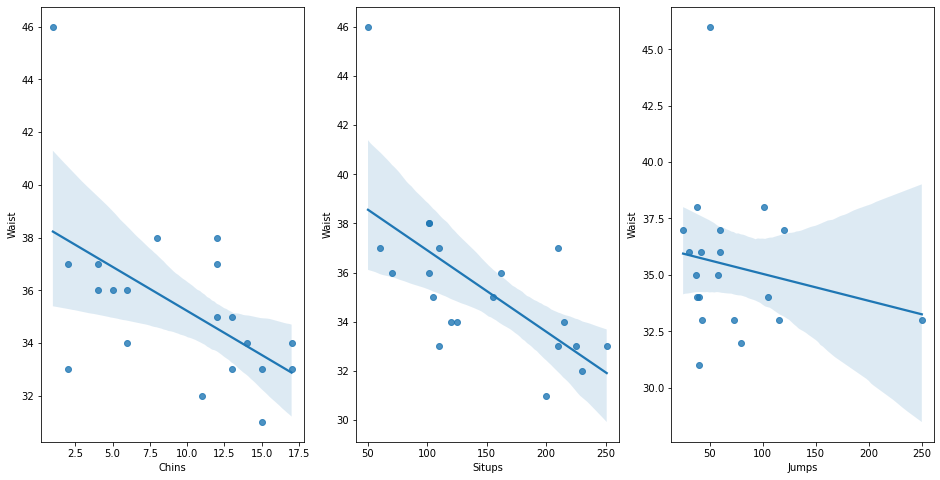

In [12]:
fig, axs = plt.subplots(figsize=(16,8), ncols=3)

lm_features = ['Chins', 'Situps', 'Jumps']

for i, feature in enumerate(lm_features):
    sns.regplot(x=feature, y='Waist', data=df, ax=axs[i])

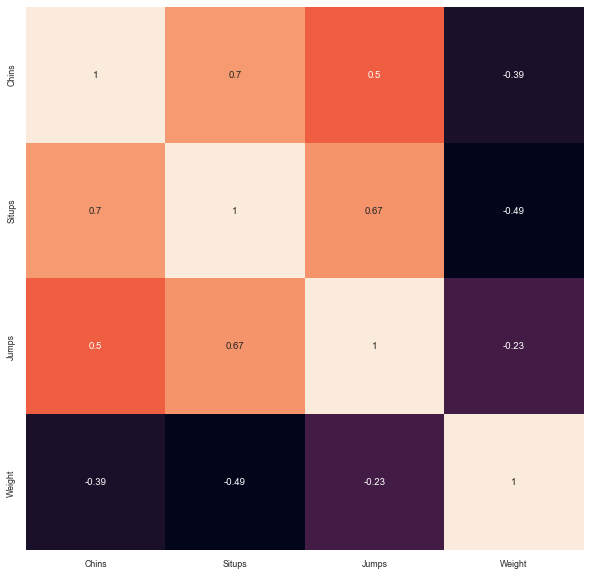

In [13]:
df_corr=df_1.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
from sklearn.model_selection import train_test_split

x_data=df.loc[:, ['Chins', 'Situps', 'Jumps']]
y_data=df.loc[:, 'Weight']
X_train, X_test, y_train, y_test=train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.25,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15, 3) (15,)
(5, 3) (5,)


In [16]:
X_train.head()

,Chins,Situps,Jumps
16,4.0,60.0,25.0
10,17.0,120.0,38.0
8,15.0,200.0,40.0
5,4.0,101.0,42.0
4,13.0,155.0,58.0


In [17]:
y_train.head()

16    176.0
10    169.0
8     176.0
5     182.0
4     189.0
Name: Weight, dtype: float64

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
print("회귀계수(기울기):", np.round(lr.coef_, 1)) #np: numpy, coef_: 피처에 대한 회귀 계수 값
print("상수항(절편):", np.round(lr.intercept_, 1))  #intercept_: 상수항(절편) 값

회귀계수(기울기): [-1.  -0.1  0.2]
상수항(절편): 199.3


In [21]:
y_preds = lr.predict(X_test)
print(X_train.shape, X_test.shape)

(15, 3) (5, 3)


In [22]:
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

MSE : 1264.513, RMSE: 35.560
Variance score : 0.130


In [23]:
print("절편 값:", lr.intercept_) 
print("회귀계수:", np.round(lr.coef_,1))

절편 값: 199.33150389629282
회귀계수: [-1.  -0.1  0.2]


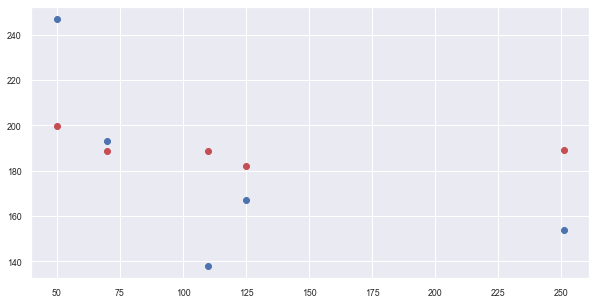

In [24]:
y_test_pred=lr.predict(X_test)
plt.figure(figsize=(10,5))
plt.scatter(X_test['Situps'], y_test, label='y_test')
plt.scatter(X_test['Situps'], y_test_pred, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()

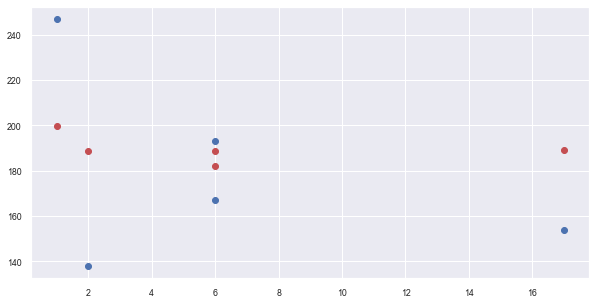

In [25]:
y_test_pred=lr.predict(X_test)
plt.figure(figsize=(10,5))
plt.scatter(X_test['Chins'], y_test, label='y_test')
plt.scatter(X_test['Chins'], y_test_pred, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()

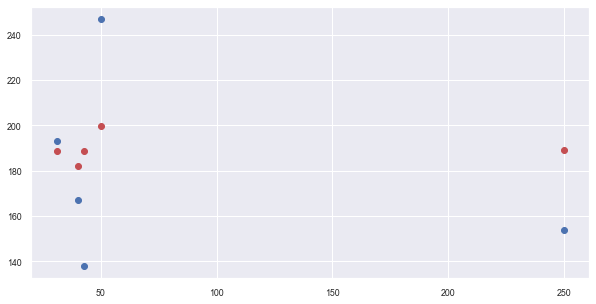

In [26]:
y_test_pred=lr.predict(X_test)
plt.figure(figsize=(10,5))
plt.scatter(X_test['Jumps'], y_test, label='y_test')
plt.scatter(X_test['Jumps'], y_test_pred, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()

In [27]:
X_test

,Chins,Situps,Jumps
19,2.0,110.0,43.0
13,1.0,50.0,50.0
9,17.0,251.0,250.0
7,6.0,125.0,40.0
14,6.0,70.0,31.0


In [28]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 36.53765181289022


In [33]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 36.893454975103644


In [32]:
from sklearn import svm

model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

sy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(sy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 37.42152001188621


In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 1, include_bias=False)
poly.fit(X_train)
train_poly = poly.transform(X_train)
test_poly = poly.transform(X_test)
print(train_poly.shape)

(15, 3)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
X_train = ss.transform(train_poly)
X_test = ss.transform(test_poly)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
ridge = Ridge()
lasso = Lasso()
alpha_L = [0.001, 0.01, 0.1, 1, 10, 100]

In [ ]:
ridge_trainS = []
ridge_testS = []
lasso_trainS = []
lasso_testS = []
for j in alpha_L:
    ridge = Ridge(alpha=j)
    lasso = Lasso(alpha=j, max_iter=1000000)
    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    ridge_trainS.append(ridge.score(X_train, y_train))
    ridge_testS.append(ridge.score(X_test, y_test))
    lasso_trainS.append(lasso.score(X_train, y_train))
    lasso_testS.append(lasso.score(X_test, y_test))

In [ ]:
plt.figure(1)
plt.title("Lasso train score")
plt.plot(np.log10(alpha_L), ridge_trainS)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.figure(2)
plt.title("Lasso test score")
plt.plot(np.log10(alpha_L), ridge_testS, c='orange')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show

In [ ]:
plt.figure(1)
plt.title("Lasso train score")
plt.plot(np.log10(alpha_L), ridge_trainS)
plt.plot(np.log10(alpha_L), ridge_testS)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show

In [ ]:
plt.figure(1)
plt.title("Lasso train score")
plt.plot(np.log10(alpha_L), lasso_trainS)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.figure(2)
plt.title("Lasso test score")
plt.plot(np.log10(alpha_L), lasso_testS, c='orange')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show

In [ ]:
plt.figure(1)
plt.title("Lasso train, test score")
plt.plot(np.log10(alpha_L), lasso_trainS)
plt.plot(np.log10(alpha_L), lasso_testS)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show

In [ ]:
lasso = Lasso(alpha=1, max_iter=10000)
lasso.fit(X_train, y_train)
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))